# 2.3 Bidimensional normal distribution

Most useful applications of gaussian distributions does not only look at individual distributions or variables, but an assortment of random distributions which can be dependant to each other. Some examples of these *multidimensional distributions* we will use in following exercises are: the pose of a robot $(x, y, \theta)$, an observation from a series of range sensors $([z_0, z_1, \dots, z_n])$, among others. 

In the specific case of Gaussian distributions they present certain key differences:

- The *mean* $(\mu)$ now it contains a vector of $n$ values $([\mu_1, \mu_2, \dots, \mu_n]')$. Its dimensionality/shape is $(n \times 1)$, i.e. is a vertical vector.
- The *covariance* (now referred as $\Sigma$) is a full-blown matrix of shape $(n \times n)$. The case being, now we need to express the relations (i.e. dependence) of each variable to the rest.

In [3]:
# Imports

import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import stats

from utils.PlotEllipse import PlotEllipse

# 2.3.1 Sum of bidimensional random variables

In this exercise, we will take a look at how gaussians beheave when we sum 2 multidimensional random variables (*RV*).

Given the sum of 2 multidimensional gaussian RVs $(X_1, X_2)$, the resulting RV $(X_3)$ also follows a gaussian distribution defined as:

$$
    \left.
    \begin{aligned}
    X_1 &\sim N(\mu_1, \Sigma_1) \\
    X_2 &\sim N(\mu_2, \Sigma_2) \\
    X_3 &= X_1 + X_2
    \end{aligned}
    \enspace\right\}\enspace 
    X_3 \sim N(\mu_1 + \mu_2, \Sigma_1 + \Sigma_2)
$$

**Assignment**

1. Generate and draw `n_samples` random samples from 2 different bidimensional dists. $N_1=N(\mu_1,\Sigma_1)$ y $N_2=N(\mu_2,\Sigma_2)$. The *mean* $(\mu_n)$ is a vector of dimension $(2 \times 1)$ and the *covariance* $(\sigma_n)$ a matrix $(2 \times 2)$. They represent the mean and covariance of each dist. respectively. Use the function `multivariate_normal` from the module **scipy.stats**.
2. Draw both ellipses associated with each distribution. Use `PlotEllipse()` from the utils library that comes with these notebooks.
3. Sum both samples and draw the ellipse $x_3 \sim N(\mu_1+\mu_2, \Sigma_1+\Sigma_2)$

WARN: When passing the mean to the `PlotEllipse()` function, it takes a vector $(2 \times 1)$, whereas `multivariate_normal()` takes a flat array $(1 \times 2).$

**Example**

Results for an example:

```python
    n_samples = 500
    
    mean1 = np.vstack([1, 0])
    sigma1 = np.array([[3, 2], [2, 3]])
    mean2 = np.vstack([2, 3])
    sigma2 = np.array([[2, 0], [0, 1]]) 
```

<figure style="text-align:center">
  <img src="images/fig2-3-1.png" alt="">
  <figcaption>Fig. 1: Distribution of the sum of two RVs (in blue and red)</figcaption>
</figure>

In [10]:
def sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples):
    
    fig, ax = plt.subplots()

    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean=mean1.flatten(), cov=sigma1) # Hint: you have to use .flatten()
    pdf2 = stats.multivariate_normal(mean=mean2.flatten(), cov=sigma2)
    
    # Generate n_samples from them
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)

    # Draw samples as crosses
    plt.scatter(rvs1[:,0],rvs1[:,1], marker='+', label="N1")
    plt.scatter(rvs2[:,0],rvs2[:,1], marker='+', color='red', label="N2")

    # Draw ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='blue')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='red')

    # Compute and draw N1 + N2
    mean3 = mean1+mean2
    sigma3 = sigma1+sigma2
    pdf3 = stats.multivariate_normal(mean=mean3.flatten(), cov=sigma3)
    rvs3 = pdf3.rvs(n_samples)
    plt.scatter(rvs3[:,0],rvs3[:,1], marker='+',color='magenta', label="N1+N2")
    PlotEllipse(fig, ax, mean3, sigma3, mult, color='magenta')
    plt.legend()

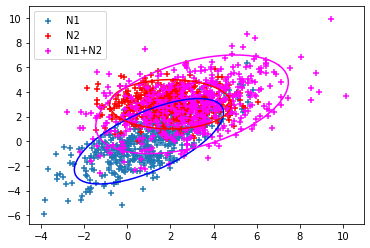

In [11]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples)

## 2.3.2 Product of gaussian pdfs

The product of two gaussian distributions (*pdfs*) is also a gaussian distribution.
This distribution corresponds to the weighted mean of samples from that same *pdfs*.

Given two gaussian distributions $N_1 \sim N(\mu_1, \Sigma_1)$ and $N_2 \sim N(\mu_2, \Sigma_2)$, the resulting gaussian $N_3$ is defined as:

$$
\begin{equation}
    \bar{X} =
        \left(
            \Sigma_1^{-1} + \Sigma_2^{-1}
        \right)^{-1}
        \left(
            \Sigma_2^{-1} X_1 + \Sigma_1^{-1} X_2
        \right)\\
     N_3 =
         \left(
             \bar{X},
             (\Sigma_1^{-1} +\Sigma_2^{-1} )
         \right)
\end{equation}
$$

**Assignment**

Given the two samples from the previous exercise, draw the ellipse (corresponding gaussian) that represents their weighted mean.

**Example**

<figure style="text-align:center">
  <img src="images/fig2-3-2.png" alt="Trulli">
  <figcaption>Fig. 2: Product of two pdfs (in blue and green)</figcaption>
</figure> 

In [25]:
def bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples):

    fig, ax = plt.subplots()
    
    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean=mean1.flatten(), cov=sigma1)
    pdf2 = stats.multivariate_normal(mean=mean2.flatten(), cov=sigma2)

    # Generate n_samples 
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)
    
    # Draw the samples
    plt.scatter(rvs1[:,0],rvs1[:,1], marker='+', color='green')
    plt.scatter(rvs2[:,0],rvs2[:,1], marker='+', color='blue')
   
    # Calculate average of distributions
    invs1 = linalg.inv(sigma1) # Hint use linalg.inv
    invs2 = linalg.inv(sigma2)

    sigma3 = linalg.inv(invs1+invs2)
    mean3 = linalg.inv(sigma1+sigma2)@(invs2@mean1+invs1@mean2) # Hint: use the @ operator
    
    # Plot the ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='green')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='blue')
    PlotEllipse(fig, ax, mean3, sigma3, mult*1.5, color='magenta') 

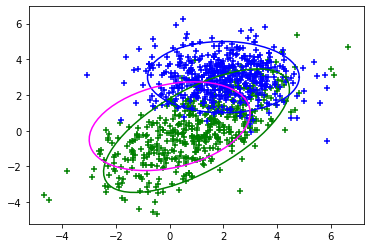

In [26]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples)

## 2.3.3 - Linear transformation of normal RVs

As we mentioned at the start of this unit, when we linearly transform a gaussian random variable, the result is still a gaussian. This is a very desirable property to have, as it allows us to operate normally, as long as the functions are linear.

**Assignment**

Using the previous samples $x_1$, check that the transformation $x_5 = A*x_1 +b$ results in a normal dist. $N(A \mu_1+b, A \Sigma_1 A^T)$. Given the matrices `A` and `b` in the code below.

**Example**

Example of the result at scale=2.5 and the values given below:

<figure style="text-align:center">
  <img src="images/fig2-3-3.png" alt="">
  <figcaption>Fig. 3: Linear transformation of RVs. Original samples (in blue) and results (in magenta)</figcaption>
</figure>

In [73]:
def bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples):
    
    fig, ax = plt.subplots()
    
    # Define the linear transformation
    A = np.array([[-1, 2], [2, 1.5]])
    b = np.vstack([3, 0])

    # Build distribution
    pdf1 = stats.multivariate_normal(mean=mean1.flatten(), cov=sigma1)

    # Draw samples from it
    rvs1 = pdf1.rvs(n_samples)

    # Show the samples
    ax.set_xlim((-16, 20))
    ax.set_ylim((-11, 16))
    ax.scatter(rvs1[:,0],rvs1[:,1], marker='+', label="x1")

    # Apply linear transformation transformacion lineal
    x5 = A@(rvs1.T)+b # Hint: use the @ operator
    x5 = x5.T
    
    # Show the new samples and its ellipse
    ax.scatter(x5[:,0],x5[:,1], marker='.', color='magenta', label='A*x1+b')
    PlotEllipse(fig, ax, A@mean1+b, A@sigma1@np.transpose(A), 2.5, color='magenta')
    ax.legend()

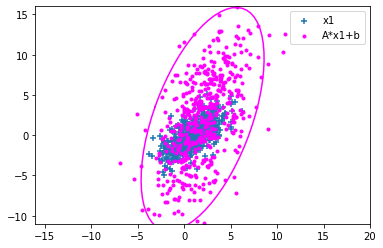

In [74]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])
    
bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples)

## Student discussion
In the cell below, discuss what has been done in the notebook, what you have found interesting, or any other relevant thought.

<span style="color:green">***Write your answer here***</span>